# Quasiperiodic Lattice

In this notebook we will show how to produce a Quasiperiodic Lattice of arbitrary symmetry and how to visualize it.

## Produce the Quasiperiodic Lattice

First, load the julia files that contains the functions required for this algorithm.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")

puntos_Dual (generic function with 1 method)

We will use the Plots package to visualize the lattice, so we load that.

In [2]:
using Plots

Next, create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

With this information we can obtain a polygon of the quasiperiodic lattice around the origin $(0,0)$

In [4]:
J = 1; #Index of a Star Vector, in this case, the first one
K = 2; #Index of a Star Vector, in this case, the second one
Nj = 0; #An integer related with the orthogonal line of the jth Star Vector
Nk = 0; #An integer related with the orthogonal line of the kth Star Vector

#The next function calculate the four vertices of the polygon generated with the previous parameters
t0, t1, t2, t3 = cuatro_Regiones(J, K, Nj, Nk, Star_Vectors, Alphas_Array);

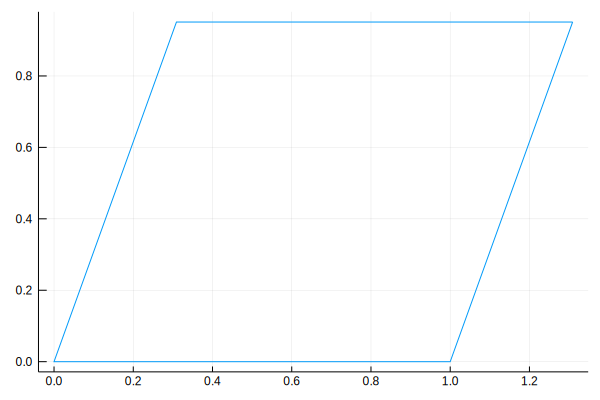

In [5]:
#Lets visualize the polygon generated with "cuatro_Regiones" function
plot([t0[1], t1[1], t2[1], t3[1], t0[1]], [t0[2], t1[2], t2[2], t3[2], t0[2]], legend = false)

Or we can generate a set of polygons generated with only two Star Vectors, sweeping different combinations of the integer numbers associated to these polygons.

In [6]:
J = 1; #Index of a Star Vector, in this case, the first one
K = 2; #Index of a Star Vector, in this case, the second one
N = 5; #Parameter that define the interval [-N,N] to the possible values for the integer numbers that will get the star vectors

#The next function get us the array of points that determine polygons in the quasiperiodic lattice and the information
#about how this points were generated.
#These information is: [Ej, Ek, Nj, Nk]
#Where Ej and Ek are the indexes of the star vectors that generate the polygon
#Nj and Nk are the integer numbers of the orthogonal lines to that star vectors
#Note that each four elements of the array "Points" are the vertices of a one polygon
Points, Information_Points = puntos_Dual_JK(J, K, N, Star_Vectors, Alphas_Array);

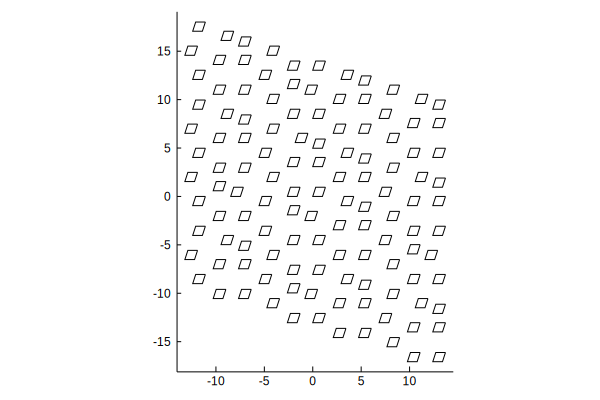

In [7]:
#Let's separate the coordinates of the Points generated in X-Coordinates and Y-Coordinates
X = [];
Y = [];
for i in Points
    push!(X, i[1]);
    push!(Y, i[2]);
end

#Let's visualize the polygons generated
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
plot!()

Finally we can generate a complete quasiperiodic lattice around the origin

In [8]:
#Index associated with how big the region of the quasiperiodic lattice will be.
#It generate the interval [-N, N] for the possible values of the integers of each star vector
N = 5;

#The next function get us the array of points that determine polygons in the quasiperiodic lattice and the information
#about how this points were generated.
#These information is: [Ej, Ek, Nj, Nk]
#Where Ej and Ek are the indexes of the star vectors that generate the polygon
#Nj and Nk are the integer numbers of the orthogonal lines to that star vectors
#Note that each four elements of the array "Points" are the vertices of a one polygon
Points, Information_Points = puntos_Dual(N, Star_Vectors, Alphas_Array);

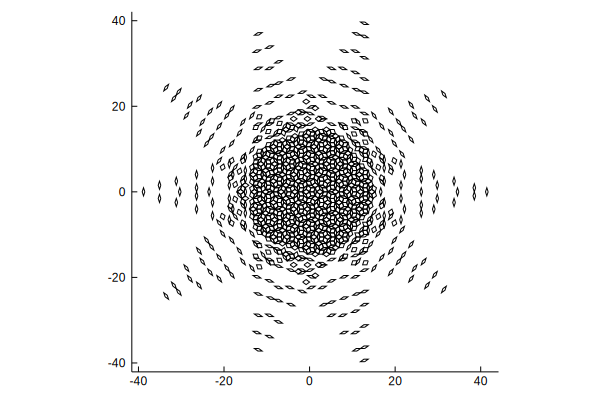

In [9]:
#Let's separate the coordinates of the Points generated in X-Coordinates and Y-Coordinates
X = [];
Y = [];
for i in Points
    push!(X, i[1]);
    push!(Y, i[2]);
end

#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
plot!()

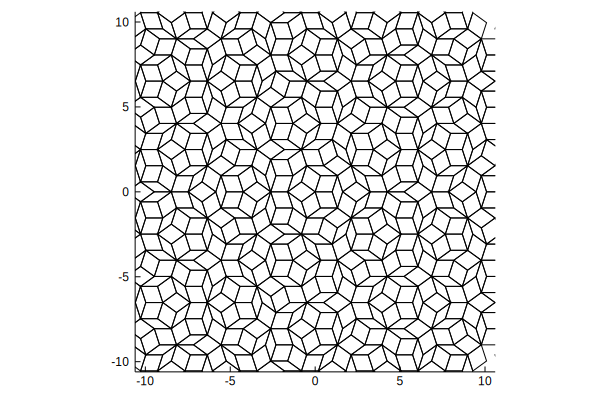

In [10]:
#We can get a zoom around the origin
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
plot!(xlimits = [-10,10], ylimits = [-10,10])

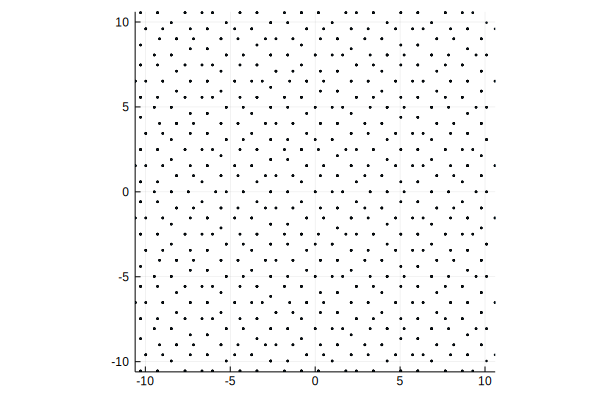

In [11]:
#Or we can just visualize the vertices without form the polygons
scatter(X, Y, xlimits = [-10,10], ylimits = [-10,10], markersize = 0.4, key = false, aspect_ratio=:equal)